importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
import warnings
warnings.filterwarnings("ignore")

importing dataset

In [4]:
train_data = pd.read_csv(r"C:\\Users\\DELL\Desktop\Dataset\rossmann-store-sales\train.csv", sep=',', parse_dates = True, index_col = 'Date',
                    dtype={'StateHoliday':str, 'SchoolHoliday':str})

In [5]:
store_data = pd.read_csv(r"C:\\Users\\DELL\Desktop\Dataset\rossmann-store-sales\store.csv")

In [6]:
print("Number of observations & Number of features", train_data.shape)
train_data.head()

('Number of observations & Number of features', (1017209, 8))


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [7]:
print("Number of observations & Number of features", store_data.shape)
store_data.head()

('Number of observations & Number of features', (1115, 10))


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
print("Train:\n\n", train_data.isnull().sum(), 
     "\n\nstore:\n\n", store_data.isnull().sum())

('Train:\n\n', Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64, '\n\nstore:\n\n', Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64)


In [9]:
store_data = store_data.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

Text(0.5,1,'Distribution of Store Competition Distance')

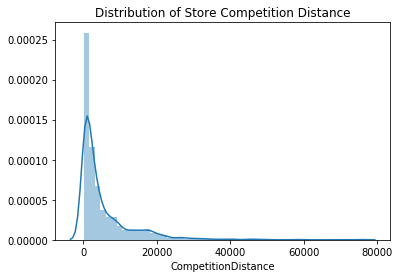

In [10]:
sns.distplot(store_data.CompetitionDistance.dropna())
plt.title("Distribution of Store Competition Distance")

In [11]:
store_data.CompetitionDistance.fillna(store_data.CompetitionDistance.median(), inplace=True)

In [12]:
train_data['Year'] = train_data.index.year
train_data['Month'] = train_data.index.month
train_data['Day'] = train_data.index.day
train_data['WeekOfYear'] = train_data.index.weekofyear
train_data = train_data.reset_index()

In [13]:
full_data = pd.merge(train_data, store_data, how='left', on='Store')
full_data.head()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2
0,2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31,c,a,1270.0,0
1,2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31,a,a,570.0,1
2,2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31,a,a,14130.0,1
3,2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31,c,c,620.0,0
4,2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31,a,a,29910.0,0


In [14]:
set(full_data.StateHoliday), set(full_data.StoreType), set(full_data.Assortment)

full_data.loc[full_data.StateHoliday == 0,'StateHoliday'] = full_data.loc[full_data.StateHoliday == 0,'StateHoliday'].astype(str)

In [15]:
full_data.head()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2
0,2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31,c,a,1270.0,0
1,2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31,a,a,570.0,1
2,2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31,a,a,14130.0,1
3,2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31,c,c,620.0,0
4,2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31,a,a,29910.0,0


In [16]:
sales = full_data[['Year','Month','Store','Sales']].groupby(['Year','Month','Store']).mean()
sales = sales.rename(columns={'Sales':'AvgSales'})
sales = sales.reset_index()

In [17]:
full_data['sales_key']=full_data['Year'].map(str) + full_data['Month'].map(str) + full_data['Store'].map(str)
sales['sales_key']=sales['Year'].map(str) + sales['Month'].map(str) + sales['Store'].map(str)

cust = full_data[['Year','Month','Store','Customers']].groupby(['Year','Month', 'Store']).mean()
cust = cust.rename(columns={'Customers':'AvgCustomer'})
cust = cust.reset_index()

full_data['cust_key']=full_data['Year'].map(str) + full_data['Month'].map(str) + full_data['Store'].map(str)
cust['cust_key']=cust['Year'].map(str) + cust['Month'].map(str) + cust['Store'].map(str)

In [18]:
full_data.head()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2,sales_key,cust_key
0,2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31,c,a,1270.0,0,201571,201571
1,2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31,a,a,570.0,1,201572,201572
2,2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31,a,a,14130.0,1,201573,201573
3,2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31,c,c,620.0,0,201574,201574
4,2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31,a,a,29910.0,0,201575,201575


In [19]:
full_data = full_data.drop('Customers', axis=1)# drop extra columns
cust = cust.drop(['Year', 'Month', 'Store'], axis=1)

full_data = pd.merge(full_data, cust, how="left", on=('cust_key'))

In [20]:
full_data.head()

,Date,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2,sales_key,cust_key,AvgCustomer
0,2015-07-31,1,5,5263,1,1,0,1,2015,7,31,31,c,a,1270.0,0,201571,201571,469.769231
1,2015-07-31,2,5,6064,1,1,0,1,2015,7,31,31,a,a,570.0,1,201572,201572,494.269231
2,2015-07-31,3,5,8314,1,1,0,1,2015,7,31,31,a,a,14130.0,1,201573,201573,616.346154
3,2015-07-31,4,5,13995,1,1,0,1,2015,7,31,31,c,c,620.0,0,201574,201574,1161.230769
4,2015-07-31,5,5,4822,1,1,0,1,2015,7,31,31,a,a,29910.0,0,201575,201575,451.615385


In [21]:
full_data['StateHoliday'] = full_data.StateHoliday.map({'0':0, 'a':1 ,'b' : 1,'c': 1})

full_data = full_data.drop(['cust_key','sales_key','Store','Date'], axis=1)

full_data_v = full_data.sample(n=5000, random_state=1)


In [22]:

corr = full_data.corr()

Text(0.5,1,'Correlation Heatmap')

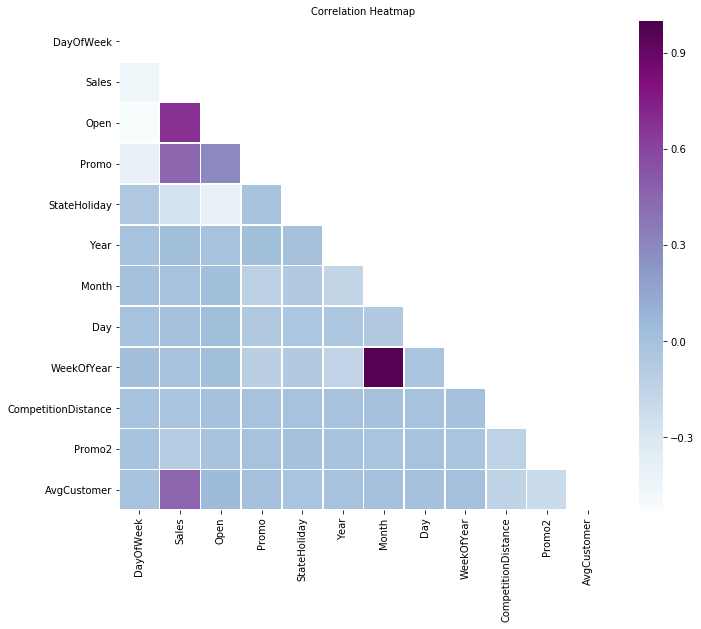

In [23]:
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (11, 9))
sns.heatmap(corr, mask = mask,
            square = True, linewidths = .7, ax = ax, cmap = "BuPu")
plt.title("Correlation Heatmap", fontsize=10)

In [26]:
import random

In [35]:
dfd = random.sample(full_data,2,2)

X = dfd.drop('Sales', axis=1) #has everything except sales
y = dfd. Sales #has only sales

xd = X.copy()
xd = pd.get_dummies(xd)

TypeError: sample() takes exactly 3 arguments (4 given)

In [ ]:
X.head()

In [64]:
y.head()

0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64

In [65]:
xd.head()

,DayOfWeek,Open,Promo,StateHoliday,Year,Month,Day,WeekOfYear,CompetitionDistance,Promo2,AvgCustomer,SchoolHoliday_0,SchoolHoliday_1,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,5,1,1,0,2015,7,31,31,1270.0,0,469.769231,0,1,0,0,1,0,1,0,0
1,5,1,1,0,2015,7,31,31,570.0,1,494.269231,0,1,1,0,0,0,1,0,0
2,5,1,1,0,2015,7,31,31,14130.0,1,616.346154,0,1,1,0,0,0,1,0,0
3,5,1,1,0,2015,7,31,31,620.0,0,1161.230769,0,1,0,0,1,0,0,0,1
4,5,1,1,0,2015,7,31,31,29910.0,0,451.615385,0,1,1,0,0,0,1,0,0


In [66]:
xl = X.copy()
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder() # used to normalize labels
xl.StateHoliday = label.fit_transform(xl.StateHoliday)
xl.Assortment = label.fit_transform(xl.Assortment)
xl.StoreType = label.fit_transform(xl.StoreType)

In [67]:
xl.head() #except sales

,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2,AvgCustomer
0,5,1,1,0,1,2015,7,31,31,2,0,1270.0,0,469.769231
1,5,1,1,0,1,2015,7,31,31,0,0,570.0,1,494.269231
2,5,1,1,0,1,2015,7,31,31,0,0,14130.0,1,616.346154
3,5,1,1,0,1,2015,7,31,31,2,2,620.0,0,1161.230769
4,5,1,1,0,1,2015,7,31,31,0,0,29910.0,0,451.615385


In [68]:
from sklearn.model_selection import train_test_split
xd_train,xd_test,yd_train,yd_test = train_test_split(xd,y,test_size=0.80, random_state=1) #other features data is split
xl_train,xl_test,yl_train,yl_test = train_test_split(xl,y,test_size=0.75, random_state=1) #sales data is split

from sklearn.linear_model import LinearRegression
lin= LinearRegression()
linreg = lin.fit(xd_train, yd_train)

In [69]:
xd_train.head()

,DayOfWeek,Open,Promo,StateHoliday,Year,Month,Day,WeekOfYear,CompetitionDistance,Promo2,AvgCustomer,SchoolHoliday_0,SchoolHoliday_1,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
499599,2,1,0,0,2014,4,22,17,3290.0,1,304.766667,0,1,0,0,1,0,0,0,1
559560,5,1,0,0,2014,2,28,9,250.0,0,714.785714,1,0,1,0,0,0,0,0,1
383871,6,1,0,0,2014,9,8,37,5080.0,1,539.633333,1,0,1,0,0,0,0,0,1
142872,5,1,0,0,2015,3,27,13,2070.0,1,535.192308,1,0,1,0,0,0,0,0,1
964803,3,1,0,0,2013,3,13,11,12480.0,0,419.741935,1,0,1,0,0,0,0,0,1


In [70]:
xd_test.head()

,DayOfWeek,Open,Promo,StateHoliday,Year,Month,Day,WeekOfYear,CompetitionDistance,Promo2,AvgCustomer,SchoolHoliday_0,SchoolHoliday_1,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
991180,7,0,0,0,2013,2,17,7,1200.0,0,440.214286,1,0,1,0,0,0,1,0,0
254736,6,1,0,0,2014,12,20,51,6260.0,0,302.741935,1,0,0,0,0,1,1,0,0
596948,7,0,0,0,2014,1,26,4,570.0,1,465.064516,1,0,1,0,0,0,1,0,0
890096,6,1,0,0,2013,5,18,20,680.0,1,488.483871,1,0,0,0,0,1,0,0,1
468044,2,1,1,0,2014,5,20,21,20930.0,0,484.451613,1,0,0,0,0,1,1,0,0


In [71]:
yd_train.head()

499599    2443
559560    6224
383871    5313
142872    6810
964803    3957
Name: Sales, dtype: int64

In [72]:
yd_test.head()

991180       0
254736    6922
596948       0
890096    7583
468044    6272
Name: Sales, dtype: int64

In [73]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(x, y):
    return sqrt(mean_squared_error(x, y))
# definte MAPE function
def mape(x, y):
    return np.mean(np.abs((x - y) / x)) * 100 

In [74]:
# get cross validation scores
yd_predicted = linreg.predict(xd_train)
yd_test_predicted = linreg.predict(xd_test)
print("Regresion Model Score" , ":" , linreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , linreg.score(xd_test, yd_test))
print("Training RMSE", ":", rmse(yd_train, yd_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted))
print("Training MAPE", ":", mape(yd_train, yd_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted))

('Regresion Model Score', ':', 0.7507607206368183, ',', 'Out of Sample Test Score', ':', 0.7507144726141591)
('Training RMSE', ':', 1921.2273966539376, 'Testing RMSE', ':', 1921.8963077238311)
('Training MAPE', ':', inf, 'Testing MAPE', ':', inf)


In [75]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 50)
knnreg = knn.fit(xd_train, yd_train)

In [ ]:
print("Regresion Model Score" , ":" , knnreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , knnreg.score(xd_test, yd_test))
yd_predicted = knnreg.predict(xd_train)
yd_test_predicted = knnreg.predict(xd_test)
print("Training RMSE", ":", rmse(yd_train, yd_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted))
print("Training MAPE", ":", mape(yd_train, yd_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted))

In [ ]:
for x in range(1,10):
    knn = KNeighborsRegressor(n_neighbors = x)
    knnreg = knn.fit(xd_train, yd_train)
    print("Regresion Model Score" , ":" , knnreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , knnreg.score(xd_test, yd_test))

inspecting dataset


In [44]:
print(train_data.describe())

              Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo          Year         Month           Day    WeekOfYear  
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  
mean   3.815145e-01  2.013832e+03  6.115173e+00  1.543438e+01  2.474645e+01  
std    4.857586e-01  7.773960e-01  3.390429e+00  9.051

In [45]:
train_data.StateHoliday.unique()

array(['0', 'a', 'b', 'c'], dtype=object)

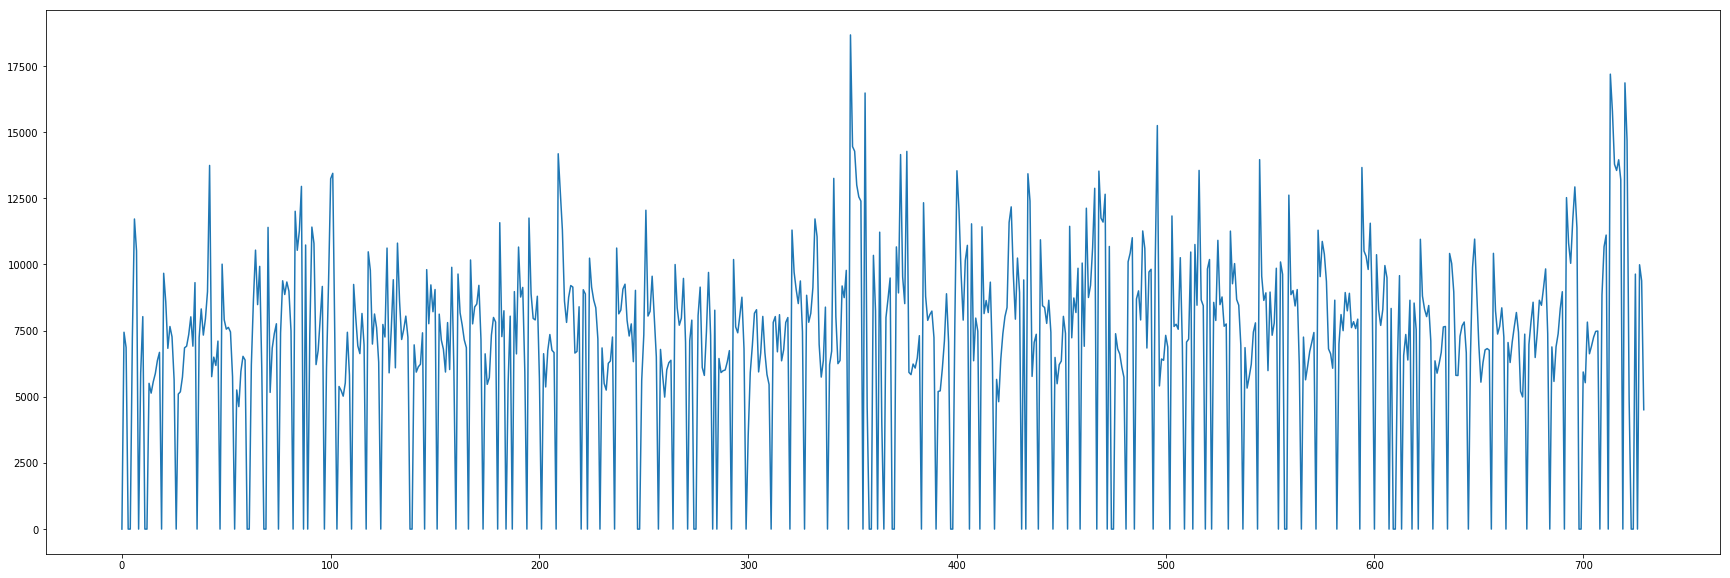

In [46]:
store_data = train_data[train_data.Store==150].sort_values('Date')
plt.figure(figsize=(30, 10))  
plt.plot(store_data.Sales.values[:730])

In [47]:
print("Mean   - {:8,.2f}".format(np.mean(train_data.Sales)))


Mean   - 5,773.82


Text(0,0.5,'Units')

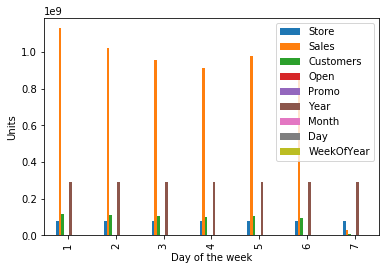

In [48]:
maxsales_plot = train_data.groupby("DayOfWeek").sum().plot(kind='bar')
maxsales_plot.set_xlabel("Day of the week")
maxsales_plot.set_ylabel("Units")

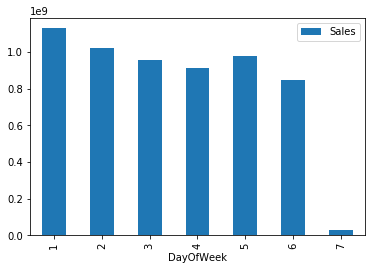

In [49]:
df_items = train_data[["DayOfWeek", "Sales"]]
df_items.groupby("DayOfWeek").sum().plot(kind="bar")

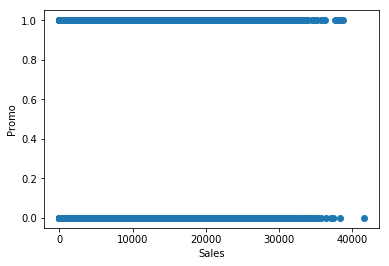

In [50]:
plt.plot( 'Sales', 'Promo', data=train_data, linestyle='none', marker='o')
plt.xlabel('Sales')
plt.ylabel('Promo')
plt.show()

Text(0.5,1,'Distribution of Customers')

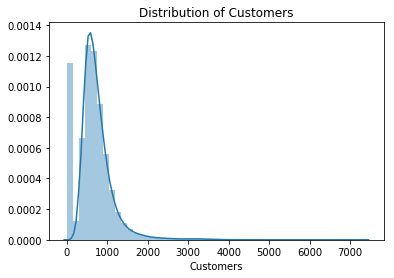

In [51]:
sns.distplot(train_data.Customers.dropna())
plt.title("Distribution of Customers")

Text(0.5,1,'Distribution of Sales')

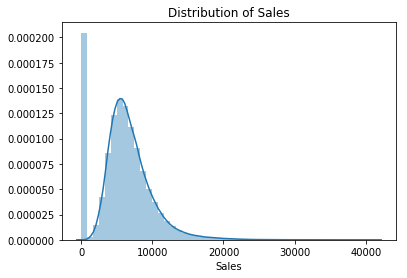

In [52]:
sns.distplot(train_data.Sales.dropna())
plt.title("Distribution of Sales")

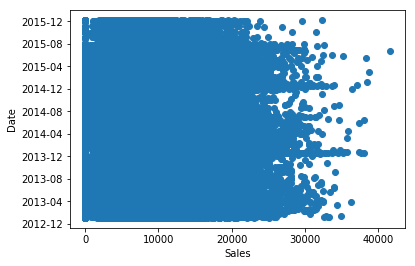

In [53]:
plt.plot( 'Sales', 'Date', data=train_data, linestyle='none', marker='o')
plt.xlabel('Sales')
plt.ylabel('Date')
plt.show()

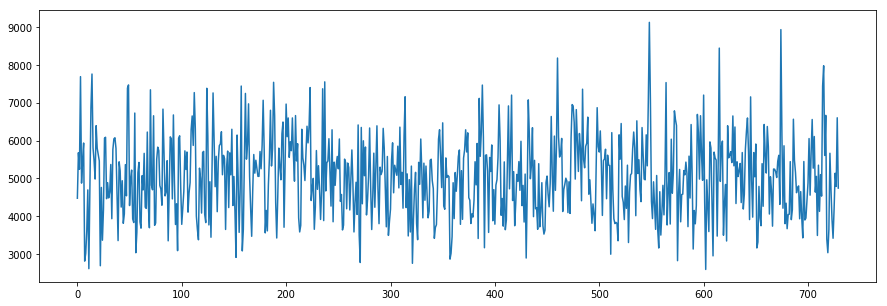

In [54]:
new_plot = train_data[train_data.Customers==500].sort_values('Date')
plt.figure(figsize=(15, 5))  
plt.plot(new_plot.Sales.values[:730])


In [55]:
# The coefficients
print('Coefficients: \n', lin.coef_)

('Coefficients: \n', array([-1.62324339e+02,  5.29253954e+03,  2.08295238e+03, -1.14167475e+03,
        1.04586870e+02,  8.34978803e-01,  8.53346819e-01,  2.59694577e+00,
        1.33646865e-02,  1.22990774e+02,  6.35141656e+00, -4.65249244e+01,
        4.65249244e+01,  4.50137779e+02, -2.02136592e+03,  3.52003936e+02,
        1.21922421e+03,  1.21555241e+03, -2.76539991e+03,  1.54984750e+03]))


end

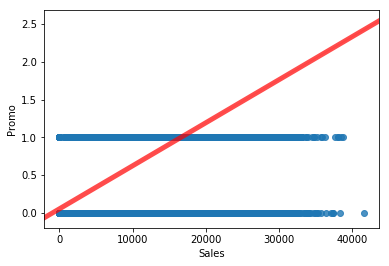

In [57]:
sns.regplot(x=train_data["Sales"], y=train_data["Promo"], line_kws={"color":"r","alpha":0.7,"lw":5})
#sns.plt.show()

In [58]:
sns.set(color_codes=True)


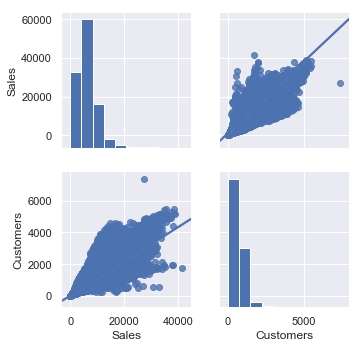

In [59]:
sns.pairplot(train_data, kind="reg",vars=["Sales","Customers"])
plt.show()

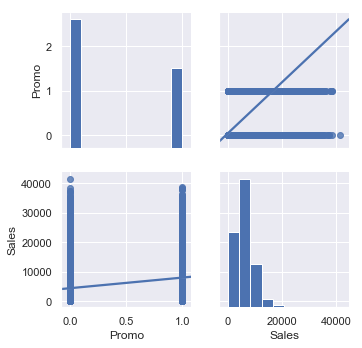

In [60]:
sns.pairplot(train_data, kind="reg",vars=["Promo","Sales"])
plt.show()

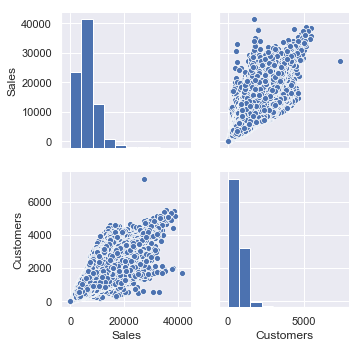

In [61]:
sns.pairplot(train_data, kind="scatter",vars=["Sales","Customers"])